<a href="https://colab.research.google.com/github/maimonahST/Data-Science/blob/main/DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
! pip install --upgrade shap tensorflow
! pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=7ba1374f11f522bdb05c43bae0b9b3aa86ba931f4cf8162521fea6d6da63e678
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


# **Population of Saudi Arabia**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import

import pandas as pd
import numpy as np

In [88]:
# load the dataset

df = pd.read_csv('/content/drive/MyDrive/DS/Population estimates by gender nationality and region 2010 - 2022_data.csv')
df.head()

,Region,Year,Gender,Nationality,Population estimates
0,Madinah,"2,014",Female,Saudi,"562,344"
1,Tabouk,"2,010",Female,Saudi,"239,792"
2,Hail,"2,013",Female,Saudi,"211,727"
3,Eastern Region,"2,016",Male,Saudi,"1,308,467"
4,Al-Baha,"2,018",Female,Non-Saudi,"16,951"


In [53]:
df.tail()

,Region,Year,Gender,Nationality,Population estimates
671,Makkah,"2,015",Male,Saudi,"1,756,374"
672,Al-Baha,"2,015",Male,Saudi,"104,524"
673,Madinah,"2,021",Male,Saudi,"658,453"
674,Tabouk,"2,020",Female,Non-Saudi,"44,416"
675,Makkah,"2,015",Female,Saudi,"1,753,158"


# Preprocessing

In [89]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                676 non-null    object
 1   Year                  676 non-null    object
 2   Gender                676 non-null    object
 3   Nationality           676 non-null    object
 4   Population estimates  676 non-null    object
dtypes: object(5)
memory usage: 26.5+ KB


### Convert the features of type "object" to numeric

In [90]:
# Remove non-numeric characters from the 'Year' and 'Population estimates' columns
df['Year'] = df['Year'].str.replace(',', '')
df['Population estimates'] = df['Population estimates'].str.replace(',', '')

# Convert the 'Year'and 'Population estimates' columns to int64
df['Year'] = df['Year'].astype('int64')
df['Population estimates'] = df['Population estimates'].astype('int64')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                676 non-null    object
 1   Year                  676 non-null    int64 
 2   Gender                676 non-null    object
 3   Nationality           676 non-null    object
 4   Population estimates  676 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 26.5+ KB


In [91]:
df.describe()

,Year,Population estimates
count,676.000000,6.760000e+02
mean,2016.000000,5.587169e+05
std,3.744428,7.062714e+05
min,2010.000000,1.430400e+04
25%,2013.000000,1.098975e+05
50%,2016.000000,2.495590e+05
75%,2019.000000,6.180745e+05
max,2022.000000,3.406281e+06


In [93]:
df.describe().to_latex()

<ipython-input-93-9422747ab8fc>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.describe().to_latex()


'\\begin{tabular}{lrr}\n\\toprule\n{} &         Year &  Population estimates \\\\\n\\midrule\ncount &   676.000000 &          6.760000e+02 \\\\\nmean  &  2016.000000 &          5.587169e+05 \\\\\nstd   &     3.744428 &          7.062714e+05 \\\\\nmin   &  2010.000000 &          1.430400e+04 \\\\\n25\\%   &  2013.000000 &          1.098975e+05 \\\\\n50\\%   &  2016.000000 &          2.495590e+05 \\\\\n75\\%   &  2019.000000 &          6.180745e+05 \\\\\nmax   &  2022.000000 &          3.406281e+06 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [94]:
# encode categorical col
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:")
print(label_mapping)

# df_new = pd.get_dummies(df, columns=['Region'], prefix='Region')
# df_new.info()

Label Mapping:
{'Al-Baha': 0, 'Al-Jouf': 1, 'Aseer': 2, 'Eastern Region': 3, 'Hail': 4, 'Jazan': 5, 'Madinah': 6, 'Makkah': 7, 'Najran': 8, 'Northern Region': 9, 'Qaseem': 10, 'Riyadh': 11, 'Tabouk': 12}


In [95]:
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:")
print(label_mapping)

df.info()

Label Mapping:
{'Female': 0, 'Male': 1}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                676 non-null    int64 
 1   Year                  676 non-null    int64 
 2   Gender                676 non-null    int64 
 3   Nationality           676 non-null    object
 4   Population estimates  676 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 26.5+ KB


In [96]:
df.head()

,Region,Year,Gender,Nationality,Population estimates
0,6,2014,0,Saudi,562344
1,12,2010,0,Saudi,239792
2,4,2013,0,Saudi,211727
3,3,2016,1,Saudi,1308467
4,0,2018,0,Non-Saudi,16951


In [97]:
df['Nationality'] = le.fit_transform(df['Nationality'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:")
print(label_mapping)

df.info()

Label Mapping:
{'Non-Saudi': 0, 'Saudi': 1}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Region                676 non-null    int64
 1   Year                  676 non-null    int64
 2   Gender                676 non-null    int64
 3   Nationality           676 non-null    int64
 4   Population estimates  676 non-null    int64
dtypes: int64(5)
memory usage: 26.5 KB


# Statistical Analysis

bar graph of all columns before encoding


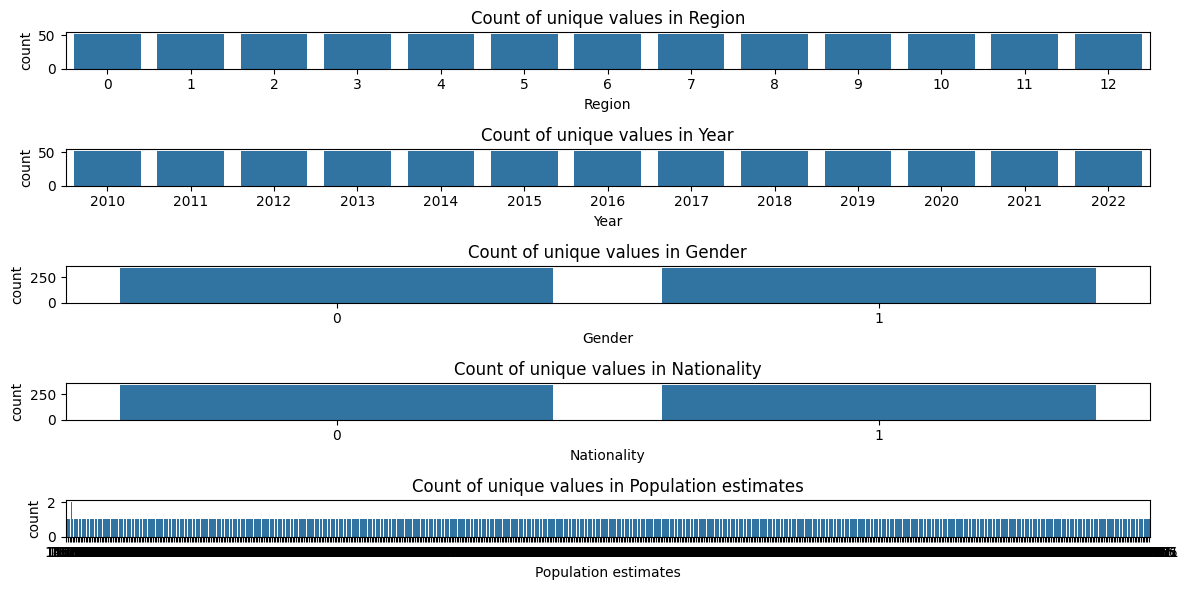

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(5,1, figsize=(12, 6))
# only for Numberic and ordinal cols

num_cols = ['Year','Population estimates']


# Plot count of unique values for each column
for i, col in enumerate(df.columns):
    ax = axes[i]
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(f'Count of unique values in {col}')

plt.tight_layout()
plt.show()


### Interquartile range (IQR)

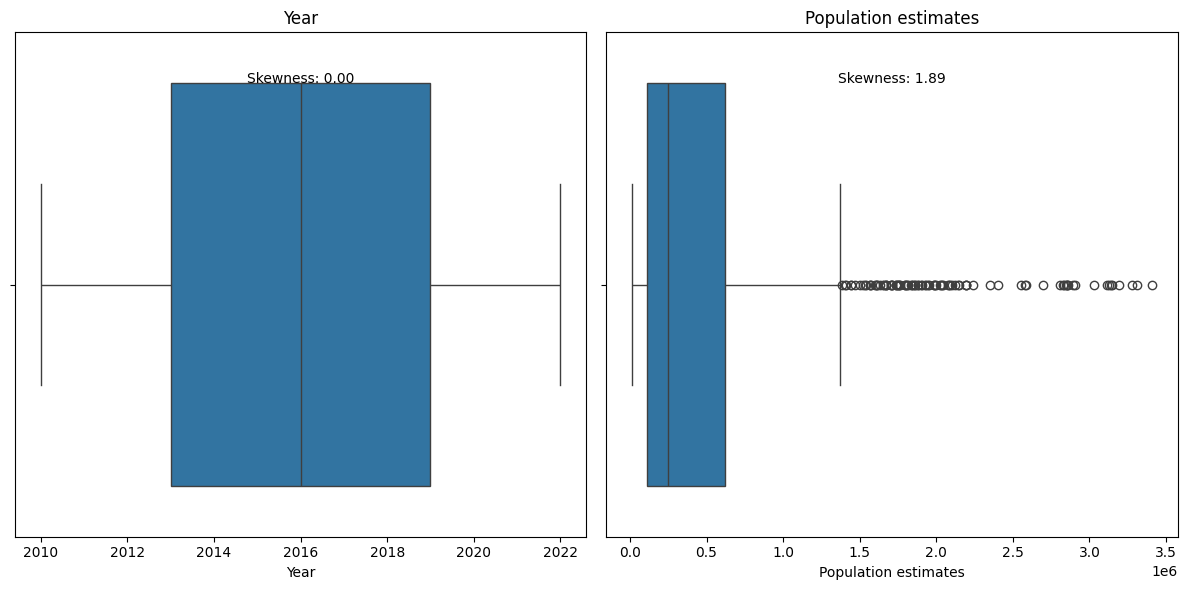

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot box plots for each column
for i, col in enumerate(df[num_cols]):
    ax = axes[i]

    # Create a box plot for the feature
    sns.boxplot(x=df[col], ax=ax)

    # Add skewness value as text on the plot
    skewness_value = df[col].skew(axis=0, skipna=True)
    ax.text(0.5, 0.9, f'Skewness: {skewness_value:.2f}', transform=ax.transAxes, ha='center')

    ax.set_title(col)
    ax.set_xlabel(f'{col}')

plt.tight_layout()
plt.show()



### Measures of shape (Skewness)

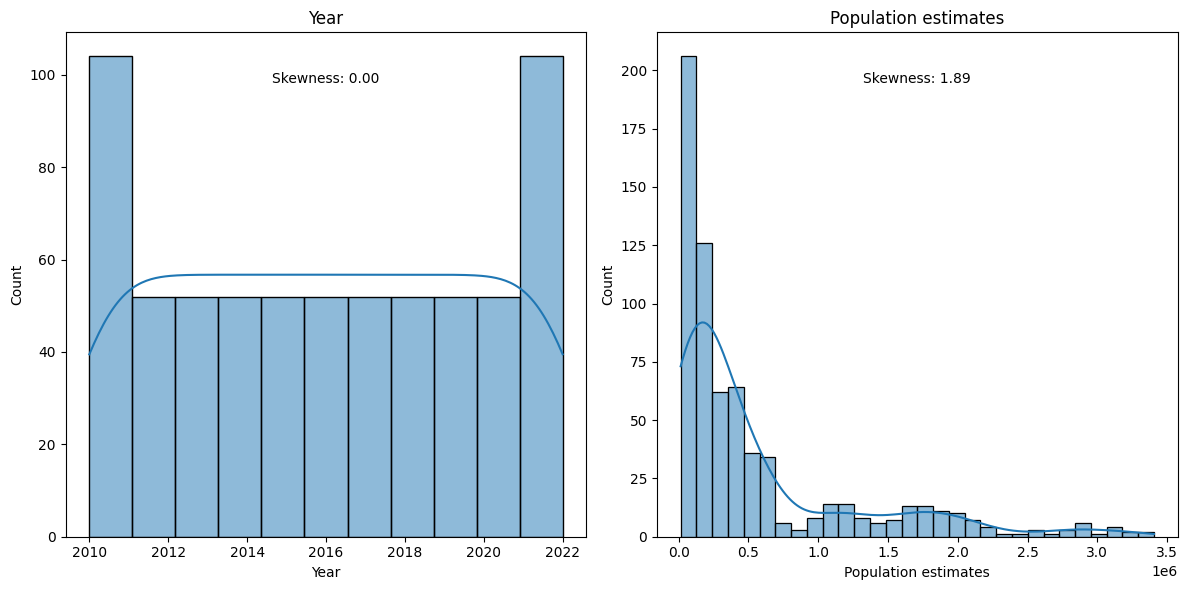

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot distribution and skewness for each column
for i, col in enumerate(df[num_cols]):
    ax = axes[i]

    # Create a histogram for the feature
    sns.histplot(df[col], kde=True, ax=ax)

    # Add skewness value as text on the plot
    skewness_value = df[col].skew(axis=0, skipna=True)
    ax.text(0.5, 0.9, f'Skewness: {skewness_value:.2f}', transform=ax.transAxes, ha='center')

    ax.set_title(col)
    ax.set_xlabel(f'{col}')

plt.tight_layout()
plt.show()


### Correlation matrix

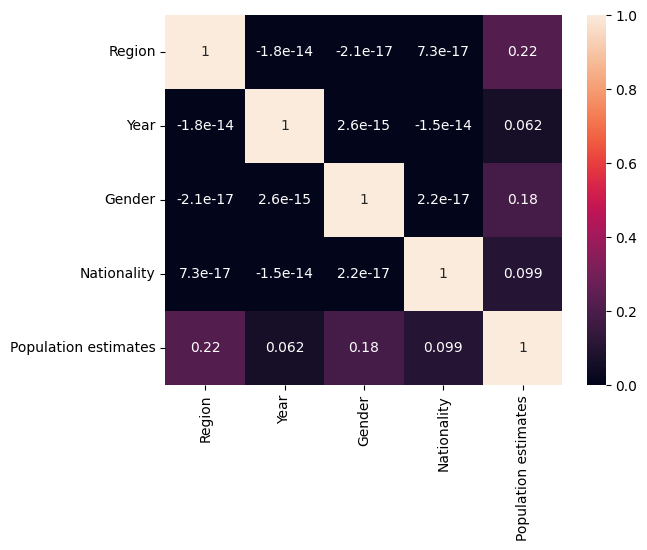

In [104]:
# correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True,  robust=True)
plt.show()


# Split the dataset

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Population estimates', axis=1)
y = df['Population estimates']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standerd scale

scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Print the shapes of the training and testing sets
print("X_train shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)


X_train shape: (540, 4)
y_train shape: (540,)
X_test shape: (136, 4)
y_test shape: (136,)


# Build and train ML models

*   R2 = 1: Perfect prediction.
*   R2 = 0: The model doesn't explain any variability in the target variable.
*   R2 < 0: The model performs worse than a simple mean model.

In [138]:
import eli5
import shap

In [237]:
features_names= X_train.columns.to_list()

## SVR Model

In [81]:
from sklearn.svm import SVR

# Define the SVR model
svr_model = SVR()

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
svr_score = svr_model.score(X_test_scaled, y_test)

# Print the model performance
print("SVR Model Performance:")
print(f"Score: {svr_score:.2f}")

SVR Model Performance:
Score: -0.18


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the hyperparameter grid
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [10, 100, 1000],
    'gamma': [0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best model and its performance
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Print the best model and its performance
print("Best Model:")
print(best_model)
print(f"Best Score: {best_score:.2f}")

In [ ]:
# Evaluate the predictions
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

## Random Forest Model

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the Random Forest model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model using coefficient of determination (R^2) and mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the model performance
print("Random Forest Model Performance:")
print(f"Coefficient of Determination (R^2): {r2_rf:.2f}")
print(f"Mean Squared Error: {mse_rf:.2f}")

Random Forest Model Performance:
Coefficient of Determination (R^2): 1.00
Mean Squared Error: 1138028317.81


In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)

# Fit the grid search object to the data
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best model and its performance
best_model_rf = grid_search_rf.best_estimator_
best_score_rf = grid_search_rf.best_score_

# Print the best model and its performance
print("Best Random Forest Model:")
print(best_model_rf)
print(f"Best Score: {best_score_rf:.2f}")

Best Random Forest Model:
RandomForestRegressor(n_estimators=200)
Best Score: 0.99


In [136]:
# Make predictions on the test set using the best Random Forest model
y_pred_rf = best_model_rf.predict(X_test_scaled)

# Evaluate the Random Forest model using mean squared error and R-squared
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics for Random Forest
print("Random Forest Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2) Score: {r2_rf:.2f}")


Random Forest Evaluation Metrics:
Mean Squared Error (MSE): 1100125634.75
R-squared (R2) Score: 1.00


In [146]:
X_train.columns.to_list()


['Region', 'Year', 'Gender', 'Nationality']

In [147]:
eli5.show_weights(best_model_rf, feature_names =X_train.columns.to_list())

Weight,Feature
0.8124 ± 0.0422,Region
0.0891 ± 0.0356,Gender
0.0813 ± 0.0196,Nationality
0.0172 ± 0.0093,Year


In [180]:
shap.initjs()
i = 3
explainer = shap.TreeExplainer(best_model_rf)
shap_values = explainer.shap_values(X_test_scaled)
shap.force_plot(explainer.expected_value[0], shap_values, X_test_scaled, feature_names = X_train.columns.to_list())

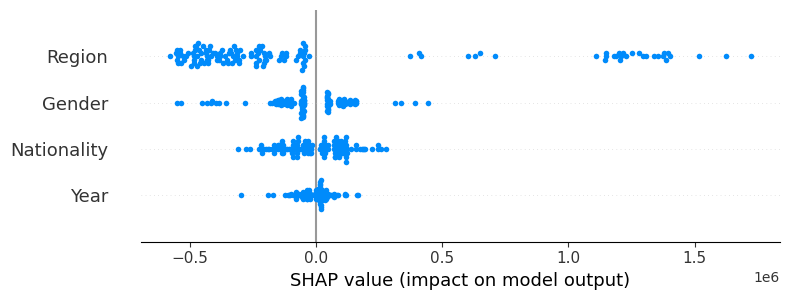

In [201]:
shap.summary_plot(shap_values, ,feature_names = X_train.columns.to_list())

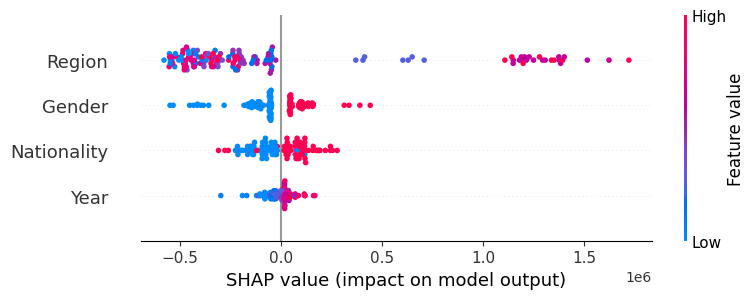

In [202]:
shap.summary_plot(shap_values, X_test_scaled ,feature_names = X_train.columns.to_list())

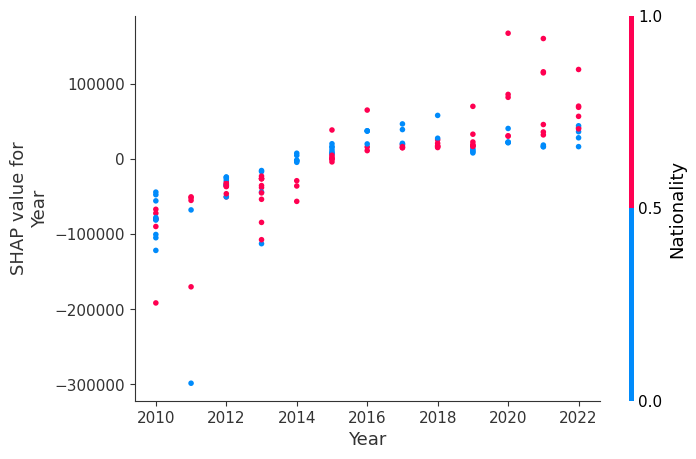

In [232]:
# we pass "Year" instead of an index because dependence_plot() will find it in X's column names for us
# Systolic BP was automatically chosen for coloring based on a potential interaction to check that
# the interaction is really in the model see SHAP interaction values below

shap.dependence_plot("Year", shap_values, X_test)

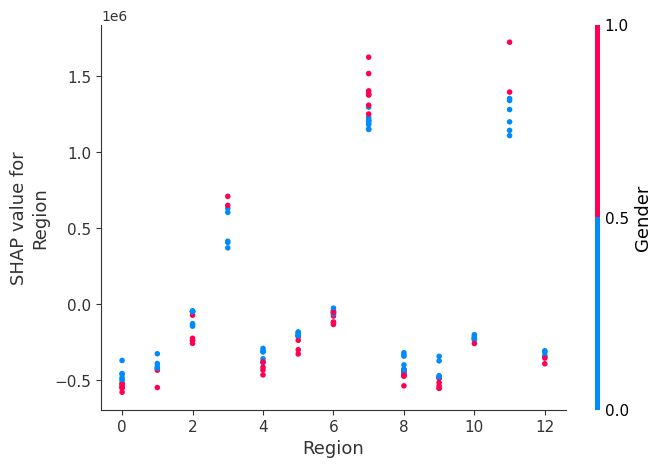

In [234]:
shap.dependence_plot("Region", shap_values, X_test)

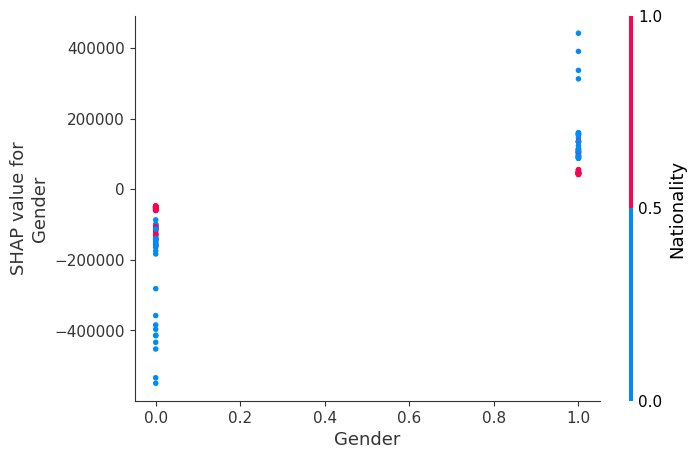

In [236]:
shap.dependence_plot("Gender", shap_values, X_test)

## Decision Tree Model

In [115]:
from sklearn.tree import DecisionTreeRegressor

# Define the Decision Tree model
dt_model = DecisionTreeRegressor()

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the Decision Tree model using coefficient of determination (R^2) and mean squared error
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print the model performance
print("Decision Tree Model Performance:")
print(f"Coefficient of Determination (R^2): {r2_dt:.2f}")
print(f"Mean Squared Error: {mse_dt:.2f}")

Decision Tree Model Performance:
Coefficient of Determination (R^2): 0.99
Mean Squared Error: 2326798674.76


In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the hyperparameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5)

# Fit the grid search object to the data
grid_search_dt.fit(X_train_scaled, y_train)

# Get the best model and its performance
best_model_dt = grid_search_dt.best_estimator_
best_score_dt = grid_search_dt.best_score_

# Print the best model and its performance
print("Best Decision Tree Model:")
print(best_model_dt)
print(f"Best Score: {best_score_dt:.2f}")

Best Decision Tree Model:
DecisionTreeRegressor(max_depth=20)
Best Score: 0.99


In [123]:
# Make predictions on the test set using the best Decision Tree model
y_pred_dt = best_model_dt.predict(X_test_scaled)

# Evaluate the Decision Tree model using mean squared error and R-squared
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print the evaluation metrics for Decision Tree
print("Decision Tree Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"R-squared (R2) Score: {r2_dt:.2f}")

Decision Tree Evaluation Metrics:
Mean Squared Error (MSE): 2326798674.76
R-squared (R2) Score: 0.99


In [148]:
eli5.show_weights(best_model_dt, feature_names =X_train.columns.to_list())

Weight,Feature
0.8035,Region
0.0938,Gender
0.0852,Nationality
0.0176,Year


In [238]:
shap.initjs()
i = 3
explainer = shap.TreeExplainer(best_model_dt)
shap_values = explainer.shap_values(X_test_scaled)
shap.force_plot(explainer.expected_value[0], shap_values, X_test_scaled, feature_names = X_train.columns.to_list())

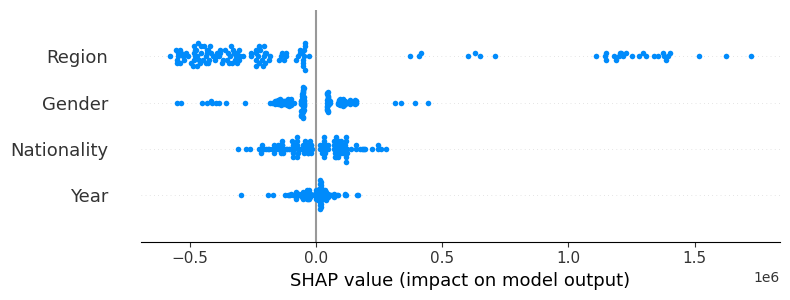

In [241]:
shap.summary_plot(shap_values,feature_names = X_train.columns.to_list())

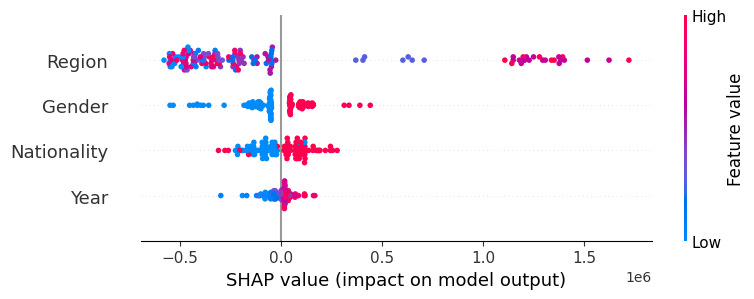

In [242]:
shap.summary_plot(shap_values, X_test_scaled ,feature_names = X_train.columns.to_list())

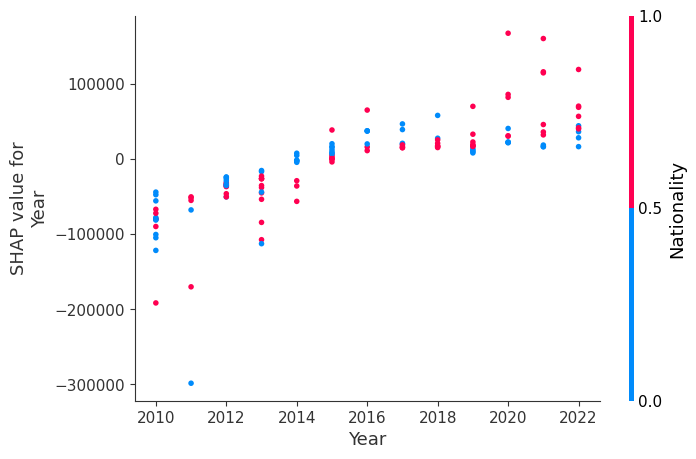

In [243]:
# we pass "Year" instead of an index because dependence_plot() will find it in X's column names for us
# Systolic BP was automatically chosen for coloring based on a potential interaction to check that
# the interaction is really in the model see SHAP interaction values below

shap.dependence_plot("Year", shap_values, X_test)

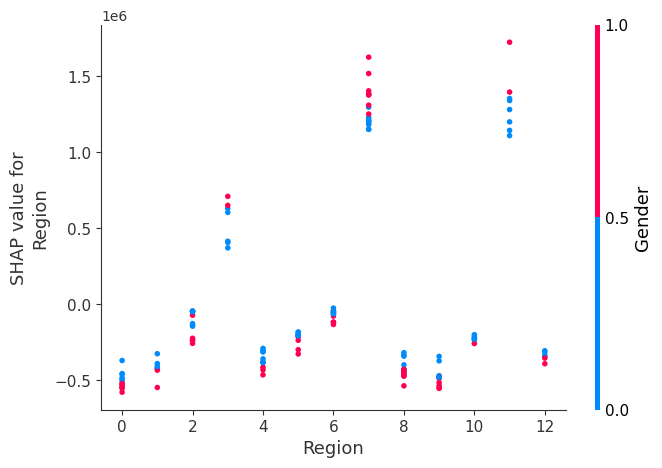

In [244]:
shap.dependence_plot("Region", shap_values, X_test)

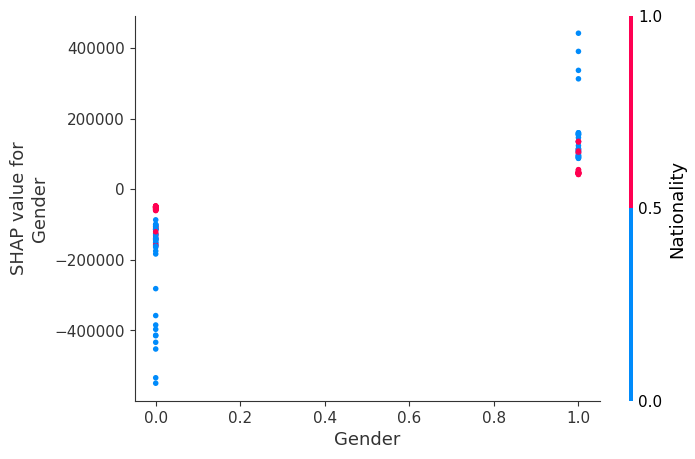

In [245]:
shap.dependence_plot("Gender", shap_values, X_test)

## Adaboost Model

In [118]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the AdaBoost model
adaboost_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, learning_rate=1.0)

# Train the model
adaboost_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test_scaled)

# Evaluate the AdaBoost model using mean squared error and R-squared
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

# Print the model performance
print("AdaBoost Model Performance:")
print(f"Coefficient of Determination (R^2): {r2_adaboost:.2f}")
print(f"Mean Squared Error: {mse_adaboost:.2f}")

AdaBoost Model Performance:
Coefficient of Determination (R^2): 0.99
Mean Squared Error: 2356192015.30


In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Define the hyperparameter grid for AdaBoost
param_grid_adaboost = {
    'estimator': [DecisionTreeRegressor(max_depth=depth, min_samples_split=split, min_samples_leaf=leaf)
                   for depth in [None, 10, 20]
                   for split in [2, 5, 10]
                   for leaf in [1, 2, 4]],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Create the GridSearchCV object for AdaBoost
grid_search_adaboost = GridSearchCV(AdaBoostRegressor(), param_grid_adaboost, cv=5)

# Fit the grid search object to the data
grid_search_adaboost.fit(X_train_scaled, y_train)

# Get the best model and its performance
best_model_adaboost = grid_search_adaboost.best_estimator_
best_score_adaboost = grid_search_adaboost.best_score_

# Print the best model and its performance
print("Best AdaBoost Model:")
print(best_model_adaboost)
print(f"Best Score: {best_score_adaboost:.2f}")

Best AdaBoost Model:
AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20,
                                                  min_samples_split=5))
Best Score: 0.99


In [124]:
# Make predictions on the test set using the best AdaBoost model
y_pred_adaboost = best_model_adaboost.predict(X_test_scaled)

# Evaluate the AdaBoost model using mean squared error and R-squared
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

# Print the evaluation metrics for AdaBoost
print("AdaBoost Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_adaboost:.2f}")
print(f"R-squared (R2) Score: {r2_adaboost:.2f}")

AdaBoost Evaluation Metrics:
Mean Squared Error (MSE): 2372801640.97
R-squared (R2) Score: 0.99


In [246]:
eli5.show_weights(best_model_adaboost, feature_names =X_train.columns.to_list())

Weight,Feature
0.7353 ± 0.1686,Region
0.1497 ± 0.1280,Gender
0.0769 ± 0.0621,Nationality
0.0381 ± 0.0569,Year
